In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 활성화 함수

In [2]:
def step_function(x):
    return np.array(x>0, dtype=np.int64)

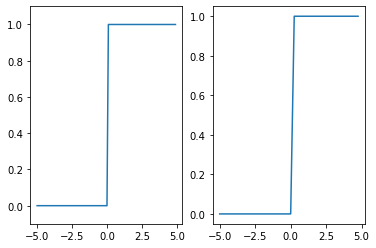

In [3]:
x1 = np.arange(-5.0, 5.0, 0.1)
x2 = np.arange(-5.0, 5.0, 0.25)

y1 = step_function(x1)
y2 = step_function(x2)

plt.subplot(121)
plt.plot(x1, y1)
plt.ylim(-0.1, 1.1)

plt.subplot(122)
plt.plot(x2, y2)

plt.show()

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

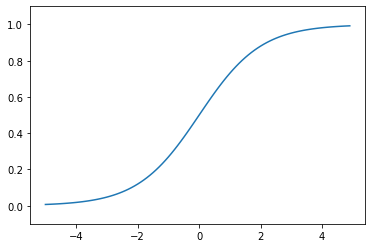

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [6]:
def relu(x):
    return np.maximum(0, x)

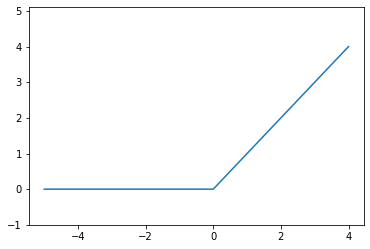

In [7]:
x = np.arange(-5.0, 5.0, 1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1, 5.1)
plt.show()

In [18]:
def softmax(x):
    c = np.max(x)
    
    exp_x = np.exp(x-c) # 오버플로우 처리
    
    sum_exp_x = np.sum(exp_x)
    
    y = exp_x / sum_exp_x
    
    return y

## 신경망 구현

In [8]:
X = np.array([1.0, 0.5])

W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [9]:
A1 = np.dot(X, W1)+B1

In [10]:
Z1 = sigmoid(A1)

In [11]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [12]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2)+B2
Z2 = sigmoid(A2)

In [13]:
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [14]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)+B3
Y = A3
Y

array([0.31682708, 0.69627909])

## 신경망 구현 정리

In [15]:
def init_network():
    network = {}
    
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# x: input
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3)+b3
    
    y = a3
    
    return y

In [16]:
network = init_network()

x = np.array([1.0, 0.5])
y = forward(network, x)

In [17]:
y

array([0.31682708, 0.69627909])